In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob
from netCDF4 import Dataset as open_ncfile
import xarray as xr

# Using volume from a density binned file

In [2]:
# Read global thickness of isopycnals and compute volume (because wrong zonal volume)
f = open_ncfile('/data/ericglod/Density_binning/Obs_Prod_density_april16/obs.EN4.historical.r0i0p0.mo.ocn.Omon.density.ver-1.latestX.nc')
thick = np.ma.average(f.variables['isonthickg'][:,:,:,:],axis=0)/1.e03
targetGrid = '/home/ysilvy/Density_bining/Yona_analysis/data/170224_WOD13_masks.nc'
# Target horizonal grid
gridFile_f  = open_ncfile(targetGrid,'r')
maskg       = gridFile_f.variables['basinmask3'][:]
areai = gridFile_f.variables['basinmask3_area'][:] #(latitude,longitude), in km2
Nii     = areai.shape[1]
Nji     = areai.shape[0]
N_s = thick.shape[0]
areaisig = np.tile(np.ma.reshape(areai,Nii*Nji), (N_s,1))
areaisig = np.ma.reshape(areaisig,[N_s,Nji,Nii])
maski       = maskg.mask ; # Global mask
# Regional masks
maskAtl = maski*1 ; maskAtl[...] = True
idxa = np.argwhere(maskg == 1).transpose()
maskAtl[idxa[0],idxa[1]] = False
maskPac = maski*1 ; maskPac[...] = True
idxp = np.argwhere(maskg == 2).transpose()
maskPac[idxp[0],idxp[1]] = False
maskInd = maski*1 ; maskInd[...] = True
idxi = np.argwhere(maskg == 3).transpose()
maskInd[idxi[0],idxi[1]] = False

# Compute total volume as thickness*area of each cell
volEN4 = thick*(1-(thick.mask).astype(int))*areaisig
print(np.ma.sum(volEN4)/1.e09) # In km3


1.3977086215200918


In [3]:
# Read variables
lat = f.variables['latitude'][:]
density = f.variables['lev'][:]
T = np.ma.average(f.variables['thetaog'][:],axis=0) # Climatological average of thetao field
S = np.ma.average(f.variables['sog'][:],axis=0)

basinN=4
latN = len(lat)
densityN = len(density)


In [4]:
lati = 30
loni = 300

In [69]:
Ti = np.ma.compressed(T[:,lati,loni])
Si = np.ma.compressed(S[:,lati,loni])
voli = np.ma.compressed(volEN4[:,lati,loni])

Text(0, 0.5, 'Temperature')

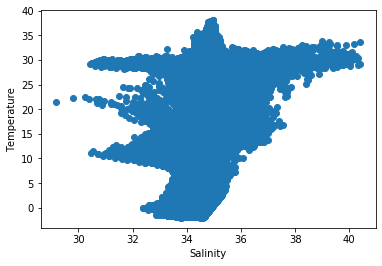

In [51]:
#plt.scatter(Si,Ti,c=voli)
plt.scatter(S[:,0:90,:],T[:,0:90,:])
plt.xlabel("Salinity")
plt.ylabel('Temperature')
#cb = plt.colorbar()
#cb.set_label('Volume')

In [39]:
x_bins = np.arange(34,36,0.05)
y_bins = np.arange(-2,25,0.1)

In [48]:
Ttest = np.ma.compressed(T[:,:,:])
Stest = np.ma.compressed(S[:,:,:])
Vtest = np.ma.compressed(volEN4[:,:,:])

Text(0, 0.5, 'Temperature')

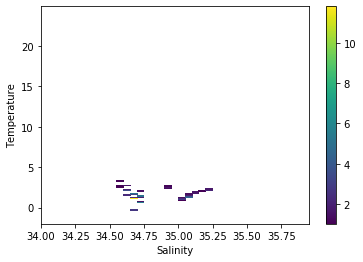

In [49]:
plt.hist2d(Stest,Ttest,weights=Vtest,bins=[x_bins,y_bins],cmin=1,density=True)
plt.colorbar()
plt.xlabel("Salinity")
plt.ylabel('Temperature')
#plt.xlim([25,41])
#plt.ylim([-3,30])

In [61]:
Scoord = np.arange(30,40.001,0.05)
Tcoord = np.arange(-3,38,0.1)

In [67]:
Vbin = np.ma.zeros([len(Scoord),len(Tcoord)])

In [68]:
Vbin.shape

(201, 410)

In [79]:
for i in range(len(Ti)):
    idxS = np.ma.argmin(np.abs(Scoord-Si[i]))
    idxT = np.ma.argmin(np.abs(Tcoord-Ti[i]))
    Vbin[idxS,idxT] = Vbin[idxS,idxT] + voli[i]

In [82]:
Vbin.shape

(201, 410)

/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The following kwargs were not used by contour: 'cmin'
  """Entry point for launching an IPython kernel.


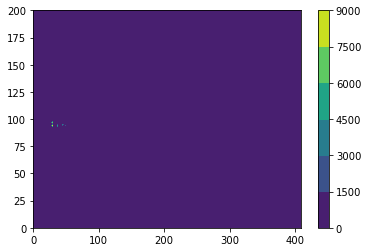

In [84]:
plt.contourf(Vbin, cmin=1)
plt.colorbar()

# Using xhistogram

In [1]:
import xarray as xr
import numpy as np
%matplotlib inline
from xhistogram.xarray import histogram

In [2]:
datadirT = '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl/r1i1p1f1/Omon/thetao/gn/latest/'
fileT = 'thetao_Omon_IPSL-CM6A-LR_piControl_r1i1p1f1_gn_295001-304912.nc'
datadirS = '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl/r1i1p1f1/Omon/so/gn/latest/'
fileS = 'so_Omon_IPSL-CM6A-LR_piControl_r1i1p1f1_gn_295001-304912.nc'

In [3]:
Tds = xr.open_dataset(datadirT+fileT)
Sds = xr.open_dataset(datadirS+fileS)

/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into f

In [4]:
sbins = np.arange(31,38, 0.025)
tbins = np.arange(-2, 32, 0.1)

In [5]:
# datadirV = '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl/r1i1p1f1/Omon/volo/gn/latest/'
# fileV = 'volo_Omon_IPSL-CM6A-LR_piControl_r1i1p1f1_gn_285001-304912.nc'
datadirareacello = '/mnt/tgcc/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl/r1i1p1f1/Ofx/areacello/gn/v20181123/'
fileareacello = 'areacello_Ofx_IPSL-CM6A-LR_piControl_r1i1p1f1_gn.nc'

In [6]:
# Vds = (xr.open_dataset(datadirV+fileV)).sel(time=slice('295001', '304912'))
a = xr.open_dataset(datadirareacello + fileareacello)

In [8]:
# Create a dz variable
dz = np.diff(Tds.olevel)
dz = np.insert(dz, 0, dz[0])
dz = xr.DataArray(dz, coords= {'olevel':Tds.olevel}, dims='olevel')

dVol = a.areacello*dz

In [35]:
T = Tds.sel(time=slice('304501','304912'))
S = Sds.sel(time=slice('304501','304912'))

In [36]:
Tclim = T.mean(dim='time')
Sclim = S.mean(dim='time')

In [84]:
hTS = histogram(Sclim.so, Tclim.thetao, bins=[sbins,tbins], weights=dVol)

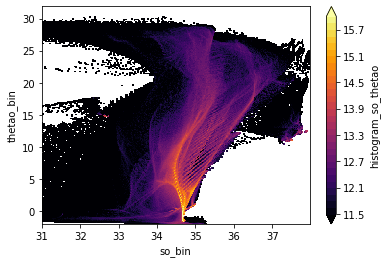

In [87]:
np.log10(hTS.T).plot(levels=31, vmin=11.5, vmax=16, cmap='inferno')

# Historical volume change 

In [ ]:
# Choose files
datadirT = '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Odec/thetao/gn/latest/'
fileT = 'thetao_Odec_IPSL-CM6A-LR_historical_r1i1p1f1_gn_1855-2005.nc'
datadirS = '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Odec/so/gn/latest/'
fileS = 'so_Odec_IPSL-CM6A-LR_historical_r1i1p1f1_gn_1855-2005.nc'
datadirareacello = '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Ofx/areacello/gn/latest/'
fileareacello = 'areacello_Ofx_IPSL-CM6A-LR_historical_r1i1p1f1_gn.nc'

# Read files
Tds = xr.open_dataset(datadirT+fileT)
Sds = xr.open_dataset(datadirS+fileS)
a = xr.open_dataset(datadirareacello + fileareacello)

# Create volume per grid cell
dz = np.diff(Tds.olevel)
dz = np.insert(dz, 0, dz[0])
dz = xr.DataArray(dz, coords= {'olevel':Tds.olevel}, dims='olevel')
dVol = a.areacello*dz

# Define bin sizes
sbins = np.arange(31,38, 0.025)
tbins = np.arange(-2, 32, 0.1)

# Select period and read T/S data
T2 = Tds.thetao[-2:,:,:,:]
S2 = Sds.so
T1 = Tds.thetao[0:2,:,:,:]
S1 = Sds.so[0:2,:,:,:]

T1clim = T1.mean(dim='time')
S1clim = S1.mean(dim='time')
T2clim = T2.mean(dim='time')
S2clim = S2.mean(dim='time')

# Make histograms
hTS1 = histogram(S1clim, T1clim, bins=[sbins,tbins], weights=dVol)
hTS2 = histogram(S2clim, T2clim, bins=[sbins,tbins], weights=dVol)

hTS_change = hTS2-hTS1

(hTS_change.T).plot(vmin=-5.e14, vmax=5.e14, cmap='bwr')